Interactive Visualizations:

Original Datase:

- https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

------------------------------------------
# i. Data Explorations

### Import library:

In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML

C:\Users\fahri\AppData\Local\Temp\ipykernel_6628\1783703635.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### Load dataset:

In [3]:
df = pd.read_csv(r"C:\Users\fahri\OneDrive\Desktop\Playgr\[98] datasets\Sample - Superstore.csv", encoding='latin1')

### Preview dataset:

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', None)
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4842,4843,CA-2017-118402,9/29/2017,10/4/2017,Standard Class,JO-15280,Jas O'Carroll,Consumer,United States,Memphis,Tennessee,38109,South,OFF-ST-10001418,Office Supplies,Storage,Carina Media Storage Towers in Natural & Black,243.920,5,0.2,-54.8820
9615,9616,CA-2014-128524,11/11/2014,11/13/2014,First Class,MZ-17515,Mary Zewe,Corporate,United States,Seattle,Washington,98115,West,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,2033.584,2,0.2,762.5940
1373,1374,US-2014-157021,4/1/2014,4/6/2014,Second Class,KM-16720,Kunst Miller,Consumer,United States,Vallejo,California,94591,West,OFF-BI-10000042,Office Supplies,Binders,"Pressboard Data Binder, Crimson, 12"" X 8 1/2""",17.088,4,0.2,5.5536
2061,2062,CA-2014-106439,10/31/2014,11/4/2014,Standard Class,GG-14650,Greg Guthrie,Corporate,United States,Los Angeles,California,90049,West,OFF-BI-10002571,Office Supplies,Binders,"Avery Framed View Binder, EZD Ring (Locking), ...",15.968,2,0.2,5.3892
1562,1563,US-2017-102890,6/30/2017,6/30/2017,Same Day,SG-20470,Sheri Gordon,Consumer,United States,New York City,New York,10011,East,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630,5,0.4,-295.9785


*The dataset has 20 entries that consist of:*

    Row ID          : Unique ID for each row.
    Order ID        : Unique Order ID for each Customer.
    Order Date      : Order Date of the product.
    Ship Date       : Shipping Date of the Product.
    Ship Mode       : Shipping Mode specified by the Customer.
    Customer ID     : Unique ID to identify each Customer.
    Customer Name   : Name of the Customer.
    Segment         : The segment where the Customer belongs.
    Country         : Country of residence of the Customer.
    City            : City of residence of of the Customer.
    State           : State of residence of the Customer.
    Postal Code     : Postal Code of every Customer.
    Region          : Region where the Customer belong.
    Product ID      : Unique ID of the Product.
    Category        : Category of the product ordered.
    Sub-Category    : Sub-Category of the product ordered.
    Product Name    : Name of the Product
    Sales           : Sales of the Product.
    Quantity        : Quantity of the Product.
    Discount        : Discount provided.
    Profit          : Profit/Loss incurred.

### Structure and data format

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

*Several data types are not match the actual data, such as `Order Date` & `Ship Date`.*

*The discount column needs to be clarified whether it is in percentage units or not.*

*Plausible to drop some columns, such as `Row ID`.*

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.describe(include="object")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [9]:
df.shape

(9994, 21)

*Based on a quick glance, the dataset looks fine except for minus value in profit which needs to specified further*

-----------------------------------------------
# ii. Data Preparations

### Missing Values Handling

In [10]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

Row ID           0.0
Postal Code      0.0
Discount         0.0
Quantity         0.0
Sales            0.0
Product Name     0.0
Sub-Category     0.0
Category         0.0
Product ID       0.0
Region           0.0
State            0.0
Order ID         0.0
City             0.0
Country          0.0
Segment          0.0
Customer Name    0.0
Customer ID      0.0
Ship Mode        0.0
Ship Date        0.0
Order Date       0.0
Profit           0.0
dtype: float64

In [11]:
df.isna().sum().sort_values(ascending=False)/len(df)*100

Row ID           0.0
Postal Code      0.0
Discount         0.0
Quantity         0.0
Sales            0.0
Product Name     0.0
Sub-Category     0.0
Category         0.0
Product ID       0.0
Region           0.0
State            0.0
Order ID         0.0
City             0.0
Country          0.0
Segment          0.0
Customer Name    0.0
Customer ID      0.0
Ship Mode        0.0
Ship Date        0.0
Order Date       0.0
Profit           0.0
dtype: float64

*No missing values*

### Duplicates Handling

In [12]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


*No duplicated values*

### Inconsistent Format Handling

Changing Dates columns data types from object to Datetime

In [13]:
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Ship Date'] = df['Ship Date'].astype('datetime64[ns]')

In [14]:
#df['year'] = df['date_added'].dt.year

                                        *cek apakah butuh bulanan & tahunan*

### Cleaning Individual Columns

In [15]:
df.sample(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5948,5949,CA-2017-161046,2017-03-05,2017-03-05,Same Day,CB-12535,Claudia Bergmann,Corporate,United States,Southaven,Mississippi,38671,South,OFF-EN-10003862,Office Supplies,Envelopes,Laser & Ink Jet Business Envelopes,42.68,4,0.0,19.6328
9827,9828,CA-2017-169999,2017-06-19,2017-06-26,Standard Class,JS-15685,Jim Sink,Corporate,United States,New York City,New York,10035,East,OFF-ST-10001511,Office Supplies,Storage,Space Solutions Commercial Steel Shelving,129.30,2,0.0,6.4650


In [16]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [17]:
df["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [18]:
df["Country"].unique()

array(['United States'], dtype=object)

In [19]:
#df["Category"].unique()
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [20]:
df["Discount"].unique()
df["Discount"].mean()

0.15620272163298934

** diskon kayanya belum dikali 100

In [21]:
df[(df['Quantity'] < 0)]
df[(df['Sales'] < 0)]
df[(df['Discount'] < 0)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


### Other transformations

In [22]:
df = df.drop(columns=['Row ID', 'Segment', 'Country', 'Postal Code'])

*some columns are dropped because they are not needed for the analysis*

In [23]:
df['Percent Profit Margin'] = ((df['Profit'] / df['Sales'])*100)

In [24]:
df['Profit per Unit'] =  (df['Profit'] / df['Quantity'])

--------

In [25]:
#df.to_csv('csv')

*Saving the cleaned dataset for visualization in Tableau.*

--------------------------
# iii. Analysis 1 : What's driving revenue?

### How is the sales trend over time?

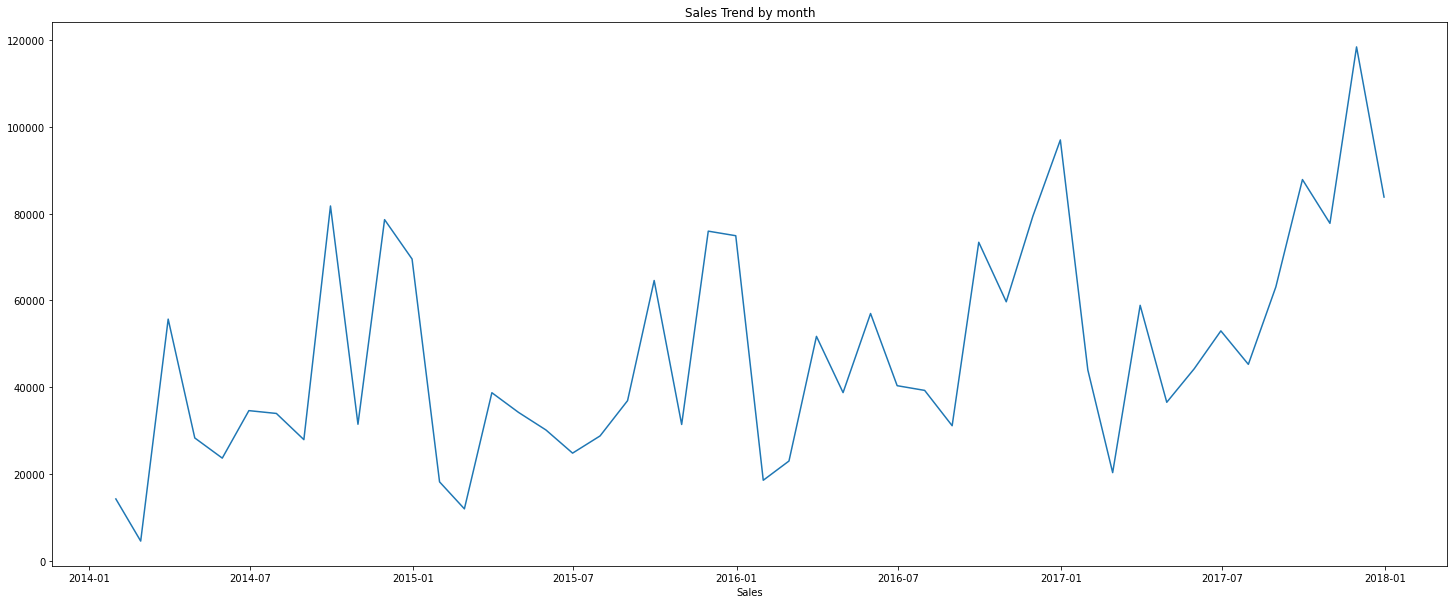

In [ ]:
# Grouping the data by Order Date and sums the values
monthly_sales = df.groupby('Order Date').sum()

# Summing the data for each month
monthly_sales = monthly_sales.resample('M').sum()

# Creating Trendline
plt.figure(figsize=(25,10))
plt.plot(monthly_sales['Sales'])
plt.xlabel('Order Date')
plt.xlabel('Sales')
plt.title("Sales Trend by month")
plt.show()

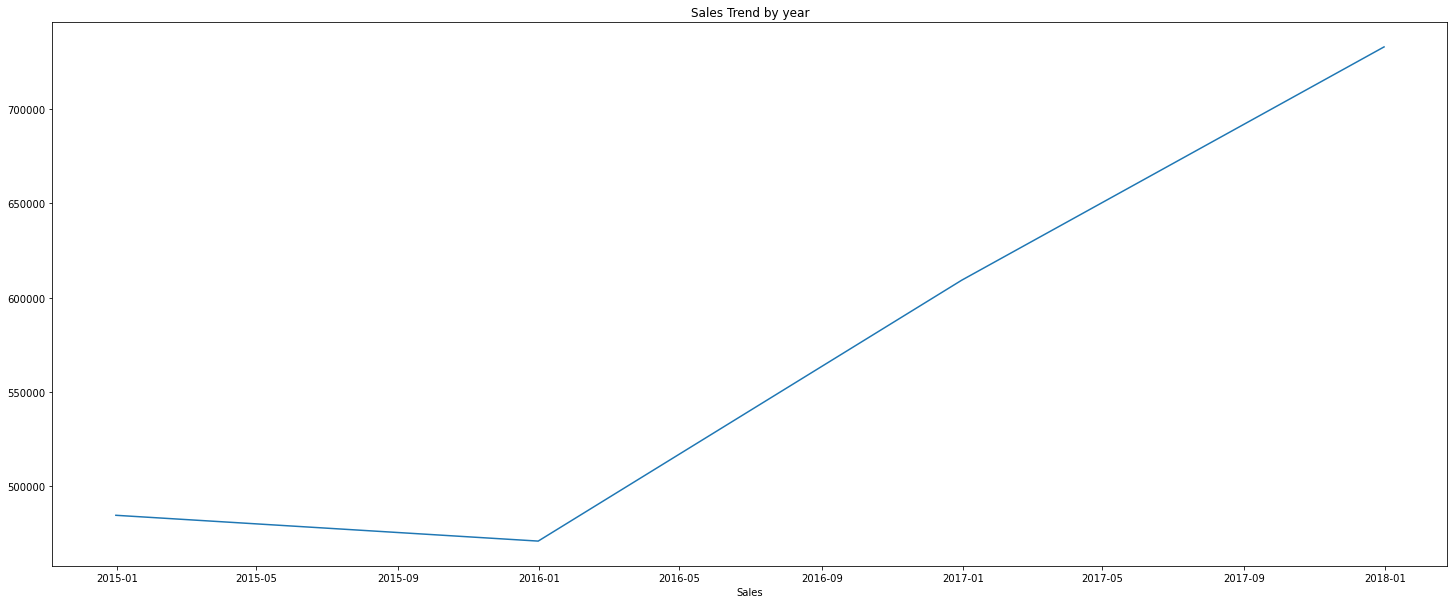

In [48]:
# Grouping the data by Order Date and sums the values
yearly_sales = df.groupby('Order Date').sum()

# Summing the data for each month
yearly_sales = monthly_sales.resample('Y').sum()

# Creating Trendline
plt.figure(figsize=(25,10))
plt.plot(yearly_sales['Sales'])
plt.xlabel('Order Date')
plt.xlabel('Sales')
plt.title("Sales Trend by year")
plt.show()

### Which state generates the most sales?

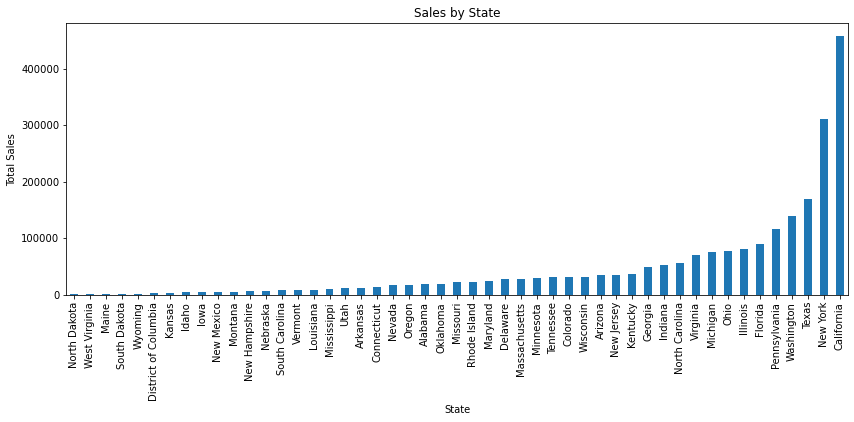

In [56]:
# Grouping sales by according state
sales_per_state = df.groupby('State')['Sales'].sum().sort_values()

# Creating barplot
plt.figure(figsize=(14, 5))
sales_per_state.plot(kind='bar')

# Inserting legend
plt.title('Sales by State')
plt.ylabel('Total Sales')
plt.show()

### Which categories & sub-categories has the highest sales?

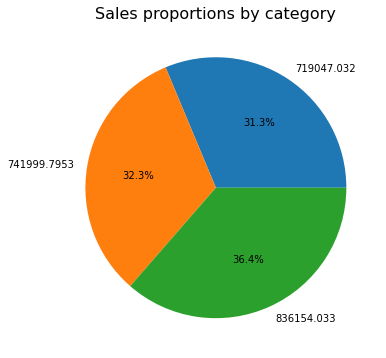

In [ ]:
# Grouping by category
sales_per_category = df.groupby('Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=True)

# Creating piechart
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')

plt.pie(sales_per_category['Sales'], labels=sales_per_category['Sales'], autopct='%1.1f%%')
plt.title('Sales proportions by category', fontsize=16)

plt.show()

C:\Users\fahri\AppData\Local\Temp\ipykernel_6628\975284376.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = ylabels)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


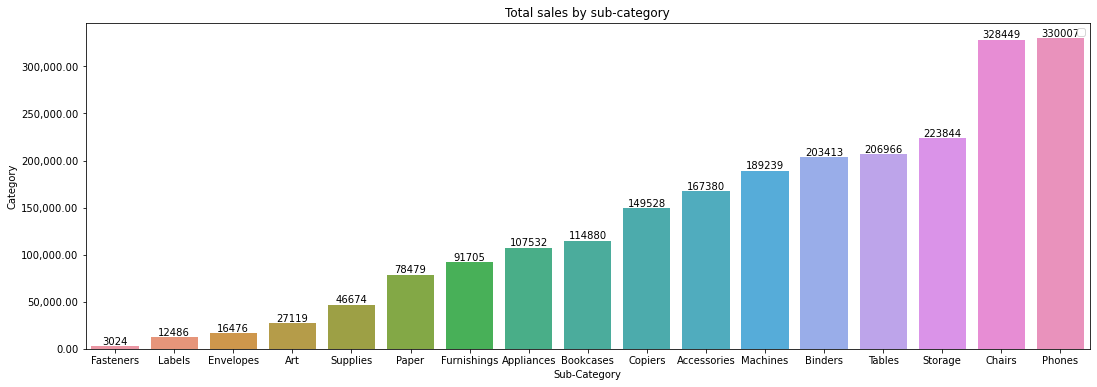

In [ ]:
# Grouping by sub-category
sales_per_sub_category = df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=True)

# Creating barplot
fig, ax = plt.subplots(figsize=(18, 6))

sns.barplot(data=sales_per_sub_category, x='Sub-Category', y='Sales', orient='v')

# Inserting data value
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', fontsize=10)

# Inserting legend
ax.set_ylabel('Category')
ylabels = ['{:,.2f}'.format(y) for y in ax.get_yticks()/1]
ax.set_yticklabels(labels = ylabels)
ax.set_title('Total sales by sub-category')
ax.legend()
plt.show()

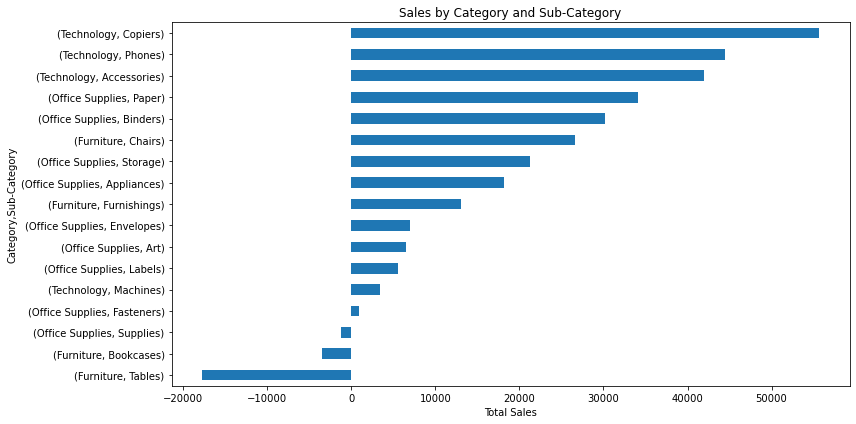

In [67]:
# Grouping by Category and Sub-Category
category_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().sort_values()

# Creating barplot
plt.figure(figsize=(12, 6))

category_profit.plot(kind='barh')
plt.title('Sales by Category and Sub-Category')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()

###  Which ship mode has the highest sales? *

# iv. Analysis 2 : But are sales really helping the business? (sales vs profit)

### How is profit trend over time?

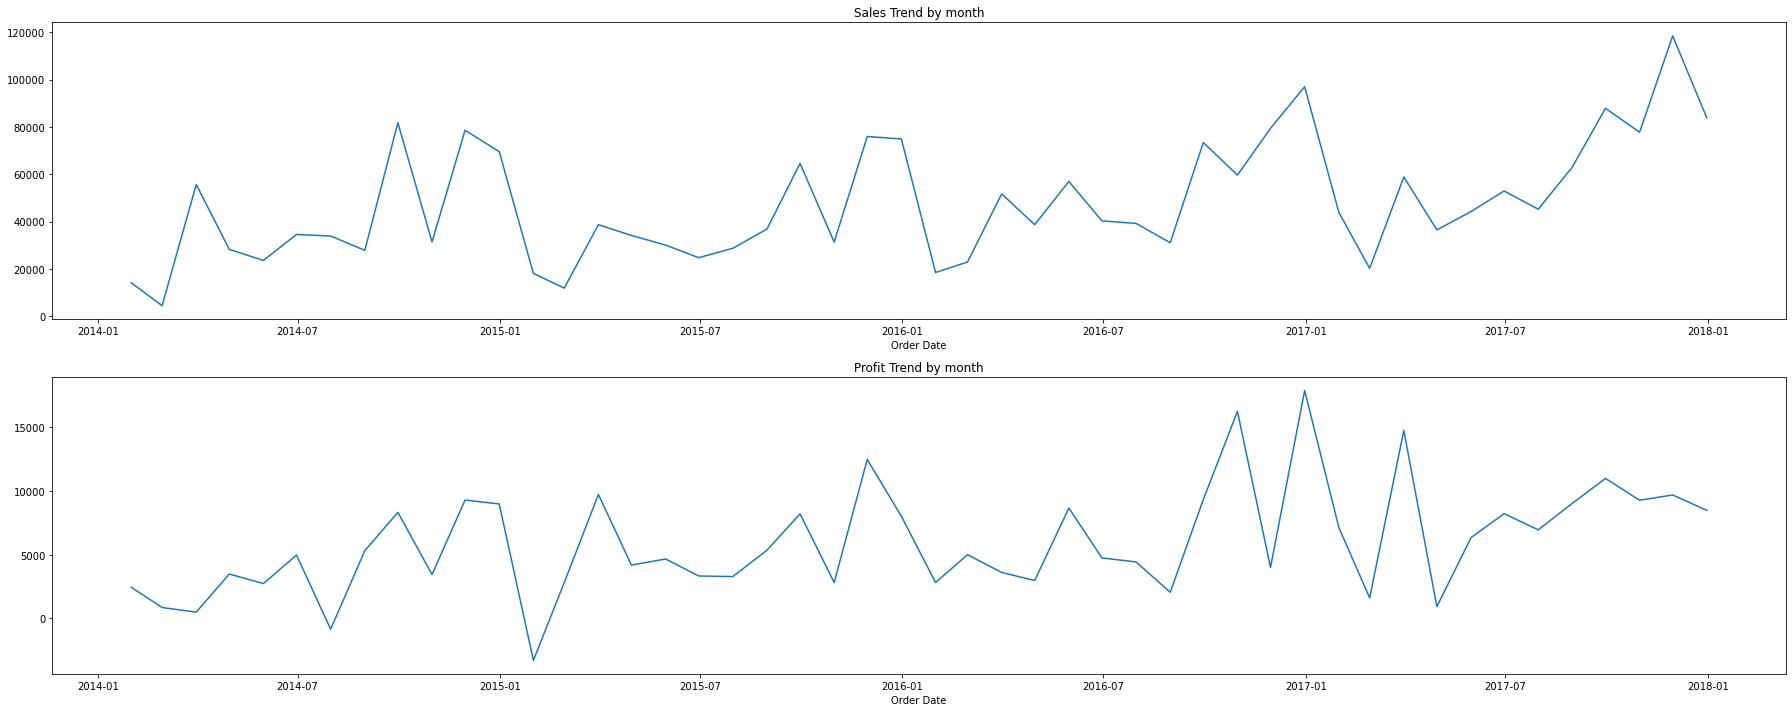

In [46]:
# Creating Trendline
fig, axes = plt.subplots(2,1, figsize=(25,10))

# Sales Trend
axes[0].plot(monthly_sales['Sales'])
axes[0].set_xlabel('Order Date')
axes[0].set_title("Sales Trend by month")

# Profit Trend
axes[1].plot(monthly_sales['Profit'])
axes[1].set_xlabel('Order Date')
axes[1].set_title("Profit Trend by month")

plt.tight_layout()
plt.show()

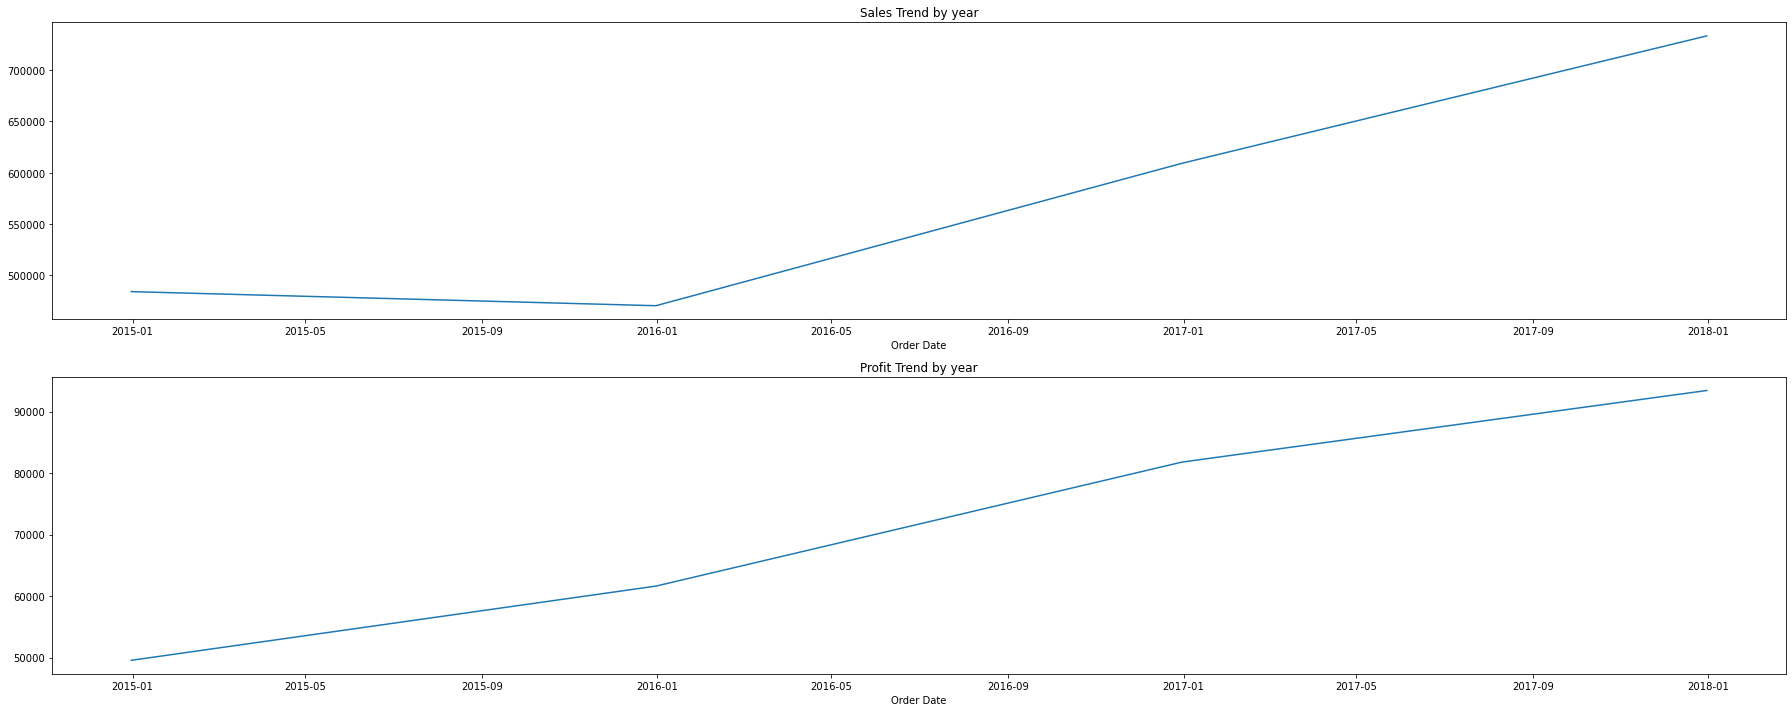

In [49]:
# Creating Trendline
fig, axes = plt.subplots(2,1, figsize=(25,10))

# Sales Trend
axes[0].plot(yearly_sales['Sales'])
axes[0].set_xlabel('Order Date')
axes[0].set_title("Sales Trend by year")

# Profit Trend
axes[1].plot(yearly_sales['Profit'])
axes[1].set_xlabel('Order Date')
axes[1].set_title("Profit Trend by year")

plt.tight_layout()
plt.show()

### Which state generates the most profit?

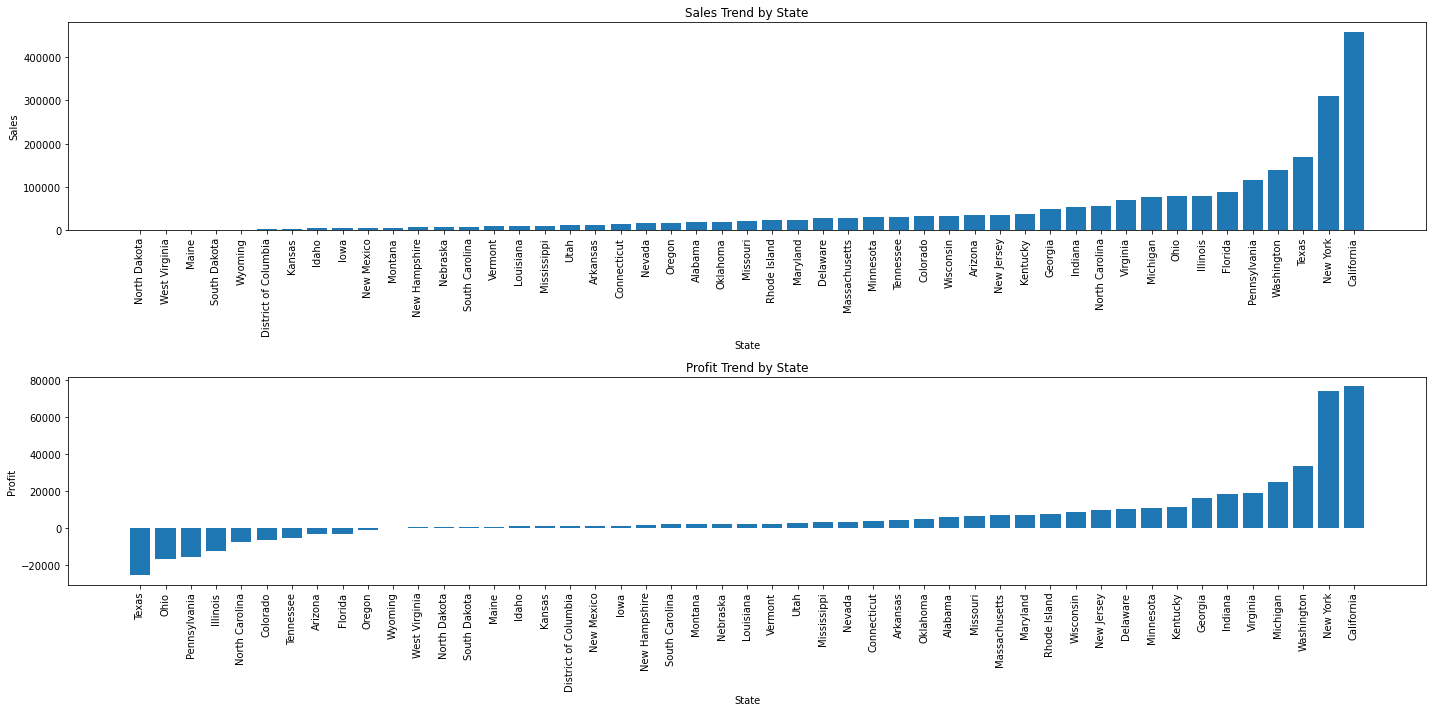

In [60]:
# Grouping sales by according state
sales_per_state = df.groupby('State')['Sales'].sum().sort_values()
profit_per_state = df.groupby('State')['Profit'].sum().sort_values()

# Create figure
fig, axes = plt.subplots(2,1, figsize=(20,10))

# Sales by state
axes[0].bar(sales_per_state.index, sales_per_state.values)
axes[0].set_xlabel('State')
axes[0].set_ylabel('Sales')
axes[0].set_title("Sales Trend by State")
axes[0].tick_params(axis='x', rotation=90)

# Profit by state
axes[1].bar(profit_per_state.index, profit_per_state.values)
axes[1].set_xlabel('State')
axes[1].set_ylabel('Profit')
axes[1].set_title("Profit Trend by State")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Which categories & sub-categories has the highest profit?

# v. Analysis 3 : The leaks

-------------------------------
# STAGING

### Which Ship Mode has the highest profit?

C:\Users\fahri\AppData\Local\Temp\ipykernel_6628\2806202510.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = ylabels)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


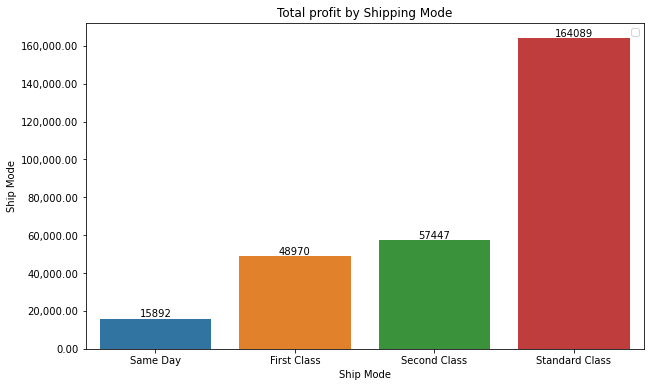

In [30]:
# Grouping profit by according its mode of shipping
profit_per_ship_mode = df.groupby('Ship Mode')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=True)

# Creating a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Creating barplot using seaborn
sns.barplot(data=profit_per_ship_mode, x='Ship Mode', y='Profit', orient='v')

# menambahkan data value
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', fontsize=10)

# Adding legend to plot
ax.set_ylabel('Ship Mode')
ylabels = ['{:,.2f}'.format(y) for y in ax.get_yticks()/1]
ax.set_yticklabels(labels = ylabels)
ax.set_title('Total profit by Shipping Mode')
ax.legend()
plt.show()

C:\Users\fahri\AppData\Local\Temp\ipykernel_6628\3882667079.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = ylabels)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


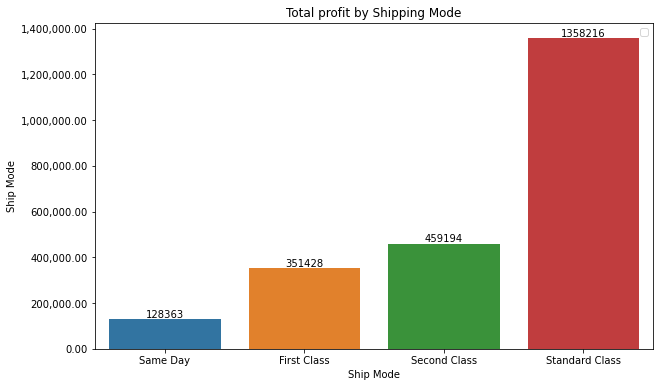

In [31]:
# Grouping profit by according its mode of shipping
profit_per_ship_mode = df.groupby('Ship Mode')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=True)

# Creating a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Creating barplot using seaborn
sns.barplot(data=profit_per_ship_mode, x='Ship Mode', y='Sales', orient='v')

# menambahkan data value
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', fontsize=10)

# Adding legend to plot
ax.set_ylabel('Ship Mode')
ylabels = ['{:,.2f}'.format(y) for y in ax.get_yticks()/1]
ax.set_yticklabels(labels = ylabels)
ax.set_title('Total profit by Shipping Mode')
ax.legend()
plt.show()

*Dari barchart diatas, dapat terlihat bahwa *

### Staging

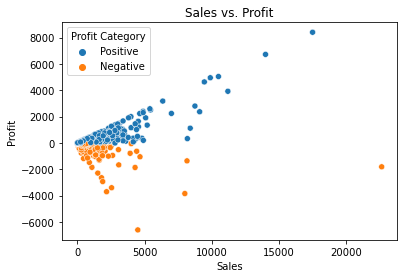

In [32]:
#sns.scatterplot(data=df, x='Sales', y='Profit')

df['Profit Category'] = df['Profit'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')

sns.scatterplot(data=df, x='Sales', y='Profit', hue='Profit Category')

plt.title('Sales vs. Profit')
plt.show()


<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

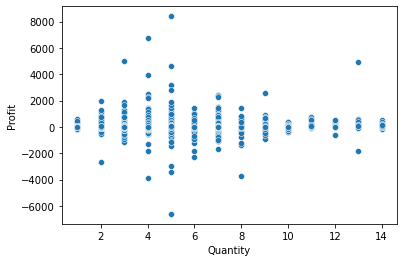

In [33]:
sns.scatterplot(data=df, x='Quantity', y='Profit')

<AxesSubplot:>

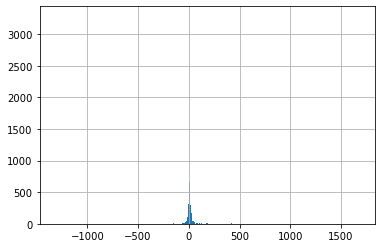

In [34]:
df['Profit per Unit'].hist(bins=1000)

-------------------------------
# vi. Conclusions

Berdasarkan analisa diatas, didapat bahwa:

Jika dilihat dari tipe properti, penjualan terbanyak adalah ditempati oleh House (78.475) sementara Farmhouse merupakan properti dengan rata-rata harga paling tinggi meskipun hanya 501 yang terjual.

Berdasarkan kota nya, rata-rata harga properti paling mahal berada di kota Lahore, jumlah properti paling banyak berada di karachi sementara properti yang rata-rata luasnya paling tinggi berada di Islamabad. Hampir di masing-masing kota, House tetap menjadi properti paling banyak terjual dengan lahore menjadi penyumbang terbanyak. Di karachi, House berada di peringkat ke 2 setelah Flat dengan selisih +- 300 unit.

Dilihat dari segi waktu, semua properti mengalami kenaikan pada bulan Mei 2019. 

Dari pengujian statistik deskriptif, diketahui bahwa distribusi harga memiliki tipe positive skew dengan nilai outlier pada harga-harga tinggi. Selain itu, tidak ditemukan nilai yang kuat antara area, jumlah bathrooms dan jumlah bedrooms ketika diuji korelasi dengan harga.

Rata-rata sales bulanan dari karachi (kota dengan properti paling banyak) dan lahore (kota dengan properti paling mahal) coba diuji melalui statistik inferensial, yaitu t-test. Didapatkan bahwa tidak ada cukup data untuk membuktikan bahwa rata-rata sales di Karachi sama dengan rata-rata sales di Lahore.

Rekomendasi:

1. Berdasarkan demand-nya, perusahaan real estate sebaiknya fokus berinvestasi di lahore dan karachi, terutama pada tipe House.
2. Berinvestasi di islamabad jika fokus real-estate besar.
3. Berinvestasi pada pembangunan famhouse dengan fokus real-estate mahal.
4. Dengan harga nya yang terjangkau, perusahan dapat melakukan up-selling untuk room & portion untuk mahasiswa dan pekerja muda yang belum berkeluarga dengan opsi buy-back.
5. Memperhatikan kebijakan dan pembangunan infrastrukur serta trend dari demand secara berkala untuk mengetahui hotspot area baru, seperti Flat di Karachi yang mulai mengalahkan House.

Rekomendasi tambahan:

1. Analisa selanjutnya dapat dilakukan perihal kondisi dari properti dan akses menuju fasilitas penunjang seperti pasar dan stasiun.
2. Dengan rata-rata pendapatan 82.100 PKR per bulan, penawaran perihal metode pembayaran dengan jangka panjang perlu dipertimbangkan untuk memperluas jangkauan customer. Dengan terlebih dahulu mengkaji risikonya.
3. Perusahaan dapat melakukan promosi di media online (seperti `Zameen.com`) untuk meraih potential customer lebih luas dan cepat, serta berdasarkan segmennya.